# Project - Investigate the IMDB Movie DataSet

## Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Aanalysis
* Conclusions

In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In this step,we understand the data,clean the data and convert it to a format that makes sense to analyse.For this
* We check duplicate rows.
* We check null values
* We drop non essential columns

In [49]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10866.0,6.606418e+04,9.213014e+04,5.000000,10596.250000,20669.000000,7.561000e+04,4.178590e+05
popularity,10866.0,6.464410e-01,1.000185e+00,0.000065,0.207583,0.383856,7.138170e-01,3.298576e+01
budget,10866.0,1.462570e+07,3.091321e+07,0.000000,0.000000,0.000000,1.500000e+07,4.250000e+08
revenue,10866.0,3.982332e+07,1.170035e+08,0.000000,0.000000,0.000000,2.400000e+07,2.781506e+09
runtime,10866.0,1.020709e+02,3.138141e+01,0.000000,90.000000,99.000000,1.110000e+02,9.000000e+02
vote_count,10866.0,2.173897e+02,5.756191e+02,10.000000,17.000000,38.000000,1.457500e+02,9.767000e+03
vote_average,10866.0,5.974922e+00,9.351418e-01,1.500000,5.400000,6.000000,6.600000e+00,9.200000e+00
release_year,10866.0,2.001323e+03,1.281294e+01,1960.000000,1995.000000,2006.000000,2.011000e+03,2.015000e+03
budget_adj,10866.0,1.755104e+07,3.430616e+07,0.000000,0.000000,0.000000,2.085325e+07,4.250000e+08
revenue_adj,10866.0,5.136436e+07,1.446325e+08,0.000000,0.000000,0.000000,3.369710e+07,2.827124e+09


In [52]:
df.describe(include ='O').T

,count,unique,top,freq
imdb_id,10856,10855,tt0411951,2
original_title,10866,10571,Hamlet,4
cast,10790,10719,Louis C.K.,6
homepage,2936,2896,http://www.thehungergames.movie/,4
director,10822,5067,Woody Allen,45
tagline,8042,7997,Based on a true story.,5
keywords,9373,8804,woman director,134
overview,10862,10847,No overview found.,13
genres,10843,2039,Comedy,712
production_companies,9836,7445,Paramount Pictures,156


In [53]:
# df.drop(['id', 'imdb_id','homepage','cast','overview','tagline','keywords','production_companies'], axis = 1, inplace = True)


In [54]:
df.duplicated().sum()

1

In [55]:
df.drop_duplicates(keep ='first', inplace=True)


In [56]:
df.duplicated().sum()

0

In [57]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [41]:
# df.dropna(axis=0, inplace=True)


### Get year, month, day from data column

In [58]:
df["year"] = pd.to_datetime(df["release_date"] ).dt.year #dt.month #.dt.day

#pd.to_numeric(error='coerce')

In [63]:
df[["release_year",'year']]

,release_year,year
0,2015,2015
1,2015,2015
2,2015,2015
3,2015,2015
4,2015,2015
...,...,...
10861,1966,2066
10862,1966,2066
10863,1966,2066
10864,1966,2066


## Check values of year column

Now we have completed the data wrangling by dropping the not required columns and removing duplicate values.

# Exploratory Data Analysis

## Some Questions we want to answer by this analysis:

1. Which genres movies are more popular?
2. What was the proportion of movies for each genre from 1960 to 2015?
2. Which genres movies are usually the longest and shortest?
3. Get the top 10 actors who have acted in most movies from 1960 to 2015.
4. Get the top 10 movies with avergae vote ratings.
5. Get the top 10 movies with popularity.
6. Get the top 10 directors with max Popularity.
7. Do movies having higher budget more popular than movies with lower budget?
8. Did longer movies have higher average vote ratings from 1960 to 2015?
9. Have longer movies been more popular than the shorter ones?
10. From 1960 to 2015,in total which was the favourite month for producers to release their movies?

## What genre movies are more popular?

In [85]:
df_copy = df.copy() 

In [80]:
df_copy['genres'] = df_copy['genres'].str.split('|')
# df_copy['genres'] = df_copy['genres'].astype(str).apply(lambda x: x.split('|'))
df_copy.explode('genres')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,2066
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,2066
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,2066
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,2066


In [94]:
df_copy = df_copy.explode('genres')

In [107]:
x = df_copy.groupby(['genres'])['popularity'].mean().sort_values()
x

genres
nan                0.167966
Documentary        0.181432
Foreign            0.191496
TV Movie           0.270896
Horror             0.465357
Music              0.487321
History            0.575936
Western            0.590615
Drama              0.591495
Romance            0.592082
Comedy             0.592607
Mystery            0.690012
War                0.727683
Thriller           0.741563
Crime              0.744930
Family             0.786668
Animation          0.852182
Action             0.926274
Fantasy            0.992840
Science Fiction    1.001548
Adventure          1.154259
Name: popularity, dtype: float64

In [104]:
sns.barplot(data = x,x='genres',y='Popularity')

ValueError: Could not interpret input 'genres'

ValueError: shape mismatch: objects cannot be broadcast to a single shape

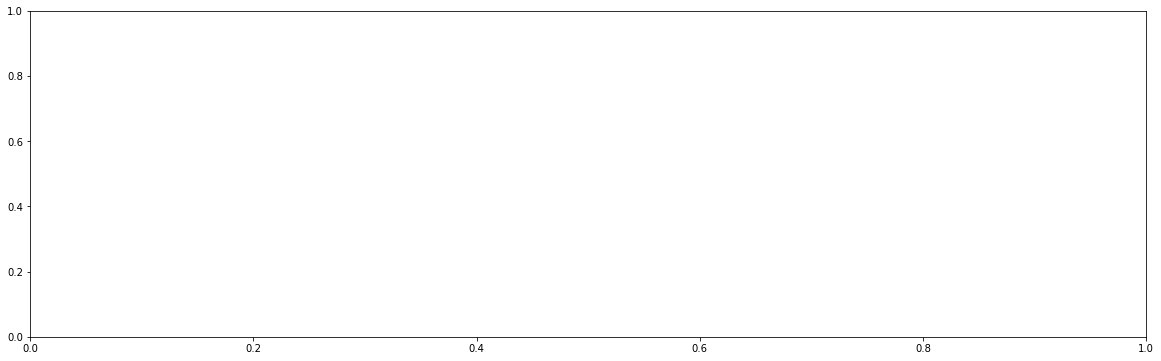

In [102]:
plt.subplots(figsize=(20, 6))
plt.bar(x, )
plt.title('popularity by genre')
plt.xlabel('genres')
plt.ylabel('Popularity');

In [ ]:
sns.barplot(data=,x=,y=,)

## What was the proportion of movies for each genre from 1960 to 2015?

In [109]:
yaer_gen = df_copy[['release_year','genres']]

<AxesSubplot:>

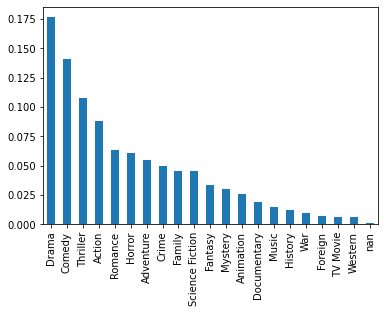

In [117]:
yaer_gen['genres'].value_counts(normalize=True).plot(kind= 'bar')

## Which genres movies are usually the longest and shortest?

<AxesSubplot:xlabel='genres'>

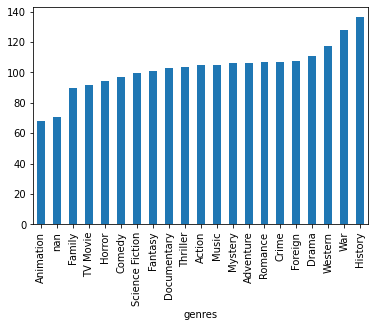

In [120]:
df_copy.groupby('genres')['runtime'].mean().sort_values().plot(kind='bar')

## Get the top 10 actors who have acted in most movies from 1960 to 2015.

In [128]:
df_copy_forcast = df.copy() 

In [129]:
df_copy_forcast['cast'] = df_copy_forcast['cast'].str.split('|')
# df_copy_forcast['cast'] = df_copy_forcast['cast'].astype(str).apply(lambda x: x.split('|'))
df_copy_forcast['cast']

0        [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1        [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2        [Shailene Woodley, Theo James, Kate Winslet, A...
3        [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4        [Vin Diesel, Paul Walker, Jason Statham, Miche...
                               ...                        
10861    [Michael Hynson, Robert August, Lord 'Tally Ho...
10862    [James Garner, Eva Marie Saint, Yves Montand, ...
10863    [Innokentiy Smoktunovskiy, Oleg Efremov, Georg...
10864    [Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...
10865    [Harold P. Warren, Tom Neyman, John Reynolds, ...
Name: cast, Length: 10865, dtype: object

In [137]:
df_copy_forcast=df_copy_forcast.explode('cast')
df_copy_forcast.isnull().sum()

id                          0
imdb_id                    41
popularity                  0
budget                      0
revenue                     0
original_title              0
cast                       76
homepage                38603
director                  156
tagline                 13066
keywords                 6905
overview                   20
runtime                     0
genres                     95
production_companies     4476
release_date                0
vote_count                  0
vote_average                0
release_year                0
budget_adj                  0
revenue_adj                 0
year                        0
0.16796621739130432         0
0.18143162499999996         0
0.1914963244680851          0
0.2708957604790419          0
0.4653566304215027          0
0.48732118382352935         0
0.5759359431137724          0
0.5906154787878787          0
0.5914953182773108          0
0.5920820490654205          0
0.5926073422093329          0
0.69001213

In [140]:
df_copy_forcast['cast'].value_counts()[0:10]#.plot(kind= 'bar')

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
Robin Williams       51
John Cusack          50
John Goodman         49
Morgan Freeman       49
Liam Neeson          48
Name: cast, dtype: int64

## Get the top 10 movies with avergae vote ratings.

In [148]:
df[['original_title','vote_average']].sort_values('vote_average', ascending =False)[0:10]

,original_title,vote_average
3894,The Story of Film: An Odyssey,9.2
538,The Mask You Live In,8.9
1200,Black Mirror: White Christmas,8.8
2269,Life Cycles,8.8
6911,Pink Floyd: Pulse,8.7
2401,Opeth: In Live Concert At The Royal Albert Hall,8.6
3690,The Art of Flight,8.5
8411,Queen - Rock Montreal,8.5
8221,A Personal Journey with Martin Scorsese Throug...,8.5
8839,Dave Chappelle: Killin' Them Softly,8.5


## Get the top 10 movies with popularity.

In [149]:
df[['original_title','popularity']].sort_values('popularity', ascending =False)[0:10]

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


## Get the top 10 directors with max Popularity.

In [155]:
df.groupby(['director'])['popularity'].mean().sort_values(ascending = False)[:10]

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
Kyle Balda|Pierre Coffin        7.404165
Alan Taylor                     6.883129
Peter Richardson                6.668990
Pete Docter                     6.326804
Christopher Nolan               6.195521
Name: popularity, dtype: float64

## Do movies having higher budget more popular than movies with lower budget?

In [160]:
prop_budg_df = df[['budget','popularity']]
prop_budg_df

,budget,popularity
0,150000000,32.985763
1,150000000,28.419936
2,110000000,13.112507
3,200000000,11.173104
4,190000000,9.335014
...,...,...
10861,0,0.080598
10862,0,0.065543
10863,0,0.065141
10864,0,0.064317


## Did longer movies have higher average vote ratings from 1960 to 2015?

## Have longer movies been more popular than the shorter ones?

## From 1960 to 2015,in total which was the favourite month for producers to release their movies?